# Generacion del indice de pobreza multidimensional del Ecuador
Este notebook se enfoca en utilizar la base de datos "base_pobreza", el cual es un formulario de entrevistas a cerca de 360,000 ecuatorianos para conocer la realidad de la pobreza en el Ecuador.

La finalidad es utilizar indicadores pertenencientes a las 4 dimensiones visualizadas a continuación:

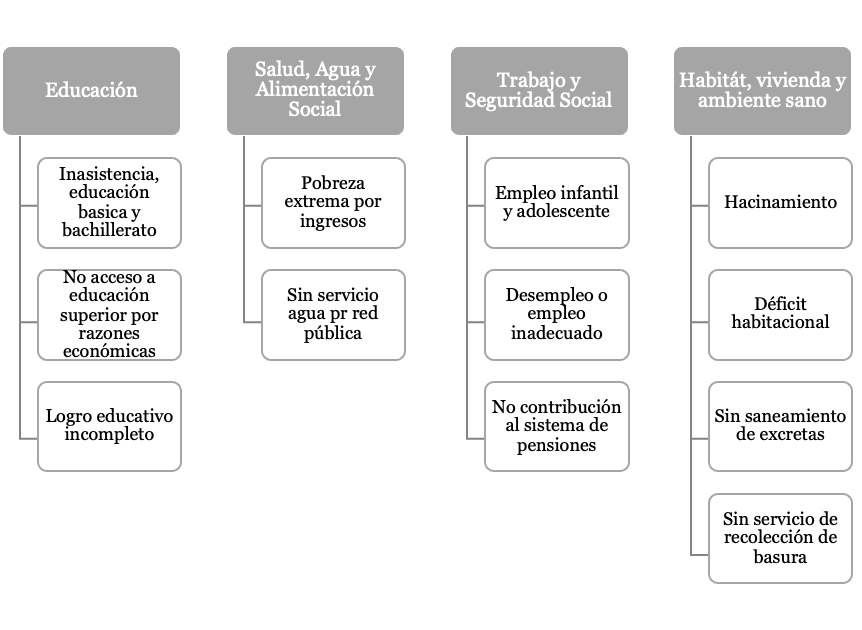

In [1]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd

In [2]:
# Importamos la base de datos base_pobreza.xlsx
df = pd.read_excel('base_pobreza.xlsx')
df.head()

,ciudad,hogar,sexo,edad,asiste_a_clases,razon_por_la_que_no_asiste,nivel_de_instrucción,ano_aprobado,trabajo_la_semana_pasada,desea_trabajar_mas_horas,...,forma_de_tenencia_de_la_vivienda,como_eliminan_la_basura,Recibio pensiones o jubilaciones,Area,Recibio el Bono de Desarrollo Humano,Horas de trabajo en la semana anterior,Ingresos de asalariados y empleados domesticos,Recibio el bono por discapacidad (Joaquin Gallegos Lara),area,etnia
0,Azuay,1,Mujer,64,No,Edad,Centro de alfabetización,6.0,No,NaN,...,Propia y totalmente pagada,Servicio municipal,Si,Urbana,No,NaN,NaN,No,Urbana,Mestizo
1,Azuay,1,Hombre,31,No,Por trabajo,Superior no universitario,3.0,Si,Trabajar más horas en su trabajo actual,...,Cedida,Servicio municipal,No,Urbana,No,40.0,600.0,No,Urbana,Mestizo
2,Azuay,1,Mujer,64,No,No está interesado en estudiar,Primaria,6.0,No,NaN,...,En arriendo,Servicio municipal,Si,Urbana,No,NaN,NaN,No,Urbana,Mestizo
3,Azuay,1,Hombre,32,No,Falta de recursos económicos,Secundaria,6.0,Si,No desea trabajar más horas,...,En arriendo,Servicio municipal,No,Urbana,No,40.0,600.0,No,Urbana,Mestizo
4,Azuay,1,Mujer,72,No,Edad,Primaria,1.0,No,NaN,...,Cedida,Servicio municipal,No,Urbana,No,NaN,NaN,No,Urbana,Negro


In [3]:
# Visualizamos los nombres de las columnas de la BD
df.columns

Index(['ciudad', 'hogar', 'sexo', 'edad', 'asiste_a_clases',
       'razon_por_la_que_no_asiste', 'nivel_de_instrucción ', 'ano_aprobado',
       'trabajo_la_semana_pasada', 'desea_trabajar_mas_horas',
       'el_trabajo_que_tiene_es', 'recibe_seguro_social',
       'seguro_social_alternativa', 'ingreso_percapita',
       'de_donde_obtiene_el_agua', 'tipo_de_vivienda', 'material_del_piso',
       'numero_de_cuartos', 'numero_de_dormitorios',
       'tipo_de_servicio_higienico', 'tipo_de_alumbrado',
       'forma_de_tenencia_de_la_vivienda', 'como_eliminan_la_basura',
       'Recibio pensiones o jubilaciones', 'Area',
       'Recibio el Bono de Desarrollo Humano',
       'Horas de trabajo en la semana anterior',
       'Ingresos de asalariados y empleados domesticos',
       'Recibio el bono por discapacidad (Joaquin Gallegos Lara)', 'area',
       'etnia'],
      dtype='object')

## Explicacion de las columnas de la base de datos
- hogar: Numero de personas por hogar (1 al 5)
- sexo: Hombre, Mujer. No se utiliza
- edad: Solo son tomadas en cuenta las edades entre 5 y 97 años.
- asiste_a_clases: Asociado a dimension Educacion. Opciones: "Si", "No". Se eliman todos los nan values de esta columna.
- razon_por_la_que_no_asiste: Asociado a indicador 2. 'Falta de recursos económicos': 40551, 'Por falta de recursos tecnológicos (internet, computadora,celular)': 97
- nivel_de_instrucción: 'Primaria', 'Secundaria', 'Educación Básica', 'Jardín de infantes', 'Educación  Media'
- ano_aprobado: Asociado a indicador 3 (<10). Hay nan values
- trabajo_la_semana_pasada: "Si, No". Asociado a Dimension Trabajo. Hay nan values
- desea_trabajar_mas_horas: No se utiliza.
- el_trabajo_que_tiene_es: Asociado a indicador 5. Empleos inadecuados:  'Con contrato temporal, ocasional o eventual', 'Con nombramiento', 'Por jornal', 'Por horas','Por obra, a destajo'. Empleo adecuado: 'Con nombramiento', 'Con contrato permanente / indefinido / estable o de planta'
- recibe_seguro_social: Si, No. Hay nan values. Asociado a indicador 6.
- seguro_social_alternativa: Tipo de seguro social. No se utiliza 
- ingreso_percapita: 450 Salario basico Unificado (Asociado a indicador 4). Pobreza extrema 50.32 (Asociado a indicado 7)
- de_donde_obtiene_el_agua: Indicador 8. Todo menos 'Red pública'
- tipo_de_vivienda: Indicador 10. 'Rancho, covacha', 'Choza', 'Mediagua', 'Cuartos en casa de inquilinato'. En general, todos menos 'Departamento','Casa o villa'. 
Indicador 9 por los Cuartos en casa de inquilinato.
- material_del_piso:  Indicador 10. Materiales no aptos: 'Tierra', 'Tabla / tablón no tratado','Caña'
- numero_de_cuartos: No se utiliza
- numero_de_dormitorios: Para calcular dividido por hogar, hacinamiento (Indicador 9)
- tipo_de_servicio_higienico: Asociado a Indicador 11. 'Excusado y pozo ciego', 'No tiene', 'Letrina' son sin sanameanto. Area urbana: 'Excusado y alcantarillado'. Area rural: 'Excusado y alcantarillado', 'Excusado y pozo séptico'
- tipo_de_alumbrado: No se utiliza para el analisis. Sin embargo, seria bueno utilizarlo
- forma_de_tenencia_de_la_vivienda: No se utiliza para el analisis.
- como_eliminan_la_basura: Indicador 12. No 'Servicio municipal'. 
- Recibio pensiones o jubilaciones: 'Si', 'No'. Indicador 6
- Area: 'Urbana', 'Rural'. Indicador 11.
- Recibio el Bono de Desarrollo Humano: 'No', 'Si'. Indicador 6
- Horas de trabajo en la semana anterior: Indicador 4 (> 30)
- Ingresos de asalariados y empleados domesticos: No se utiliza
- Recibio el bono por discapacidad (Joaquin Gallegos Lara): 'No', 'Si'. Indicador 6.

## Filtro inicial de la base
Solo quedarme como las columnas a utilizar y eliminar sus Nan values

In [4]:
df = df.drop(columns=["desea_trabajar_mas_horas", "seguro_social_alternativa", "numero_de_cuartos","tipo_de_alumbrado","forma_de_tenencia_de_la_vivienda","Ingresos de asalariados y empleados domesticos"])
df.shape

(358096, 25)

In [5]:
df = df.dropna()
df.shape

(23776, 25)

In [6]:
# Guardamos la base de datos en un archivo CSV
df.to_csv('base_pobreza_limpia.csv', index=False)

In [7]:
# Creamos un dataframe con los indices de la base de datos
df_indices = pd.DataFrame()

## Analisis descriptivo

Variables Numericas

In [8]:
df['edad'] = df['edad'].astype(int)

In [44]:
pd.options.display.float_format = "{:.2f}".format

df.describe().style.format("{:.3f}").set_table_styles([
    {'selector': 'th', 'props': [('background', '#fcba03'), ('color', 'white'), ('font-family', 'verdana')]},
    {'selector': 'td', 'props': [('font-family', 'verdana')]}
])

,hogar,edad,ano_aprobado,ingreso_percapita,numero_de_dormitorios,Horas de trabajo en la semana anterior
count,23776.000,23776.000,23776.000,23776.000,23776.000,23776.000
mean,1.003,39.242,4.569,390.605,2.417,39.545
std,0.064,12.736,1.683,373.222,1.120,12.487
min,1.000,12.000,1.000,1.000,0.000,1.000
25%,1.000,29.000,3.000,173.000,2.000,40.000
50%,1.000,38.000,5.000,286.000,2.000,40.000
75%,1.000,49.000,6.000,477.250,3.000,44.000
max,4.000,89.000,10.000,8084.000,18.000,120.000


In [45]:
exclude_columns = ['hogar', 'edad', 'ano_aprobado', 'ingreso_percapita','numero_de_dormitorios','Horas de trabajo en la semana anterior']
categorical_columns = [col for col in df.columns if col not in exclude_columns]

for col in categorical_columns:
    display(df[col].value_counts().reset_index().style.set_table_styles([
        {'selector': 'th', 'props': [('background', '#fcba03'), ('color', 'white'), ('font-family', 'verdana')]},
        {'selector': 'td', 'props': [('font-family', 'verdana')]}
    ]))

,ciudad,count
0,El Oro,9000
1,Azuay,7412
2,Carchi,1717
3,Cañar,1332
4,Cotopaxi,1255
5,Bolivar,1179
6,Chimborazo,1029
7,Esmeraldas,852


,sexo,count
0,Hombre,14217
1,Mujer,9559


,asiste_a_clases,count
0,No,23776


,razon_por_la_que_no_asiste,count
0,Por trabajo,9906
1,Terminó sus estudios,5778
2,Falta de recursos económicos,4050
3,No está interesado en estudiar,2125
4,Edad,866
5,Otra,259
6,Por cuidado de los hijos,250
7,Por falta de cupo,210
8,Por ayudar en quehaceres del hogar,168
9,Por fracaso escolar,84


,nivel_de_instrucción,count
0,Secundaria,7260
1,Superior Universitario,6493
2,Primaria,4523
3,Educación Media,2709
4,Post-grado,1405
5,Superior no universitario,841
6,Educación Básica,537
7,Centro de alfabetización,8


,trabajo_la_semana_pasada,count
0,Si,23219
1,No,557


,el_trabajo_que_tiene_es,count
0,Con contrato permanente / indefinido / estable o de planta,8345
1,"Con contrato temporal, ocasional o eventual",7340
2,Por jornal,4349
3,Con nombramiento,3524
4,Por horas,155
5,"Por obra, a destajo",63


,recibe_seguro_social,count
0,Si,12978
1,No,10798


,de_donde_obtiene_el_agua,count
0,Red pública,20773
1,Otra fuente por tubería,1496
2,Pozo,722
3,"Río, vertiente, acequia",304
4,"Carro repartidor, triciclo",257
5,Otro,214
6,Pila o llave pública,10


,tipo_de_vivienda,count
0,Casa o villa,14247
1,Departamento,7037
2,"Rancho, covacha",1174
3,Cuartos en casa de inquilinato,682
4,Mediagua,630
5,Choza,6


,material_del_piso,count
0,"Cerámica, baldosa, vinil o porcelanato",9993
1,Ladrillo o cemento,7171
2,"Duela, parquet, tablón tratado o piso flotante",3848
3,Tabla / tablón no tratado,2106
4,Tierra,556
5,Mármol o marmetón,88
6,Otro Material,8
7,Caña,6


,tipo_de_servicio_higienico,count
0,Excusado y alcantarillado,17886
1,Excusado y pozo séptico,4757
2,Excusado y pozo ciego,537
3,No tiene,475
4,Letrina,121


,como_eliminan_la_basura,count
0,Servicio municipal,21754
1,"La queman, entierran",1712
2,"Botan a la calle, quebrada, río",162
3,Contratan el servicio,141
4,Otra,7


,Recibio pensiones o jubilaciones,count
0,No,23100
1,Si,676


,Area,count
0,Urbana,17760
1,Rural,6016


,Recibio el Bono de Desarrollo Humano,count
0,No,23185
1,Si,591


,Recibio el bono por discapacidad (Joaquin Gallegos Lara),count
0,No,23761
1,Si,15


,area,count
0,Urbana,19499
1,Rural,4277


,etnia,count
0,Mestizo,21909
1,Indígena,564
2,Afroecuatoriano,350
3,Blanco,338
4,Negro,287
5,Mulato,224
6,Montuvio,97
7,Otra,7


## Indicador 1
### Descripción
Inasistencia a educación básica y bachillerato.- Se consideran privadas en el derecho a la educación los niños y niñas entre 5 a 14 años que no asisten a un centro de educación básica y también los jóvenes entre 15 a 17 años que no asisten al bachillerato.

### Cruces
edad = [5,17]  y asiste_a_clases = "Si"

In [11]:
df_indices['indicador_1'] = ((df['edad'] >= 5) & (df['edad'] <= 17) & (df['asiste_a_clases'] == 'No')).astype(int)

In [12]:
# Contamos el número de personas que se consideran privadas con el indicador 1
i1 = df_indices['indicador_1'].value_counts()[1]
i1

98

## Indicador 2
### Descripción
No acceso a educación superior por razones económicas.- Se categorizan como privadas al derecho a la educación a los jóvenes entre 18 y 29 años que habiendo terminado el bachillerato, no pueden acceder a un centro de educación superior de tercer nivel por falta de recursos económicos.
### Cruces
edad = [18,29]  y asiste_a_clases = "No"  y razon_por_la_que_no_asiste: 'Falta de recursos económicos','Por falta de recursos tecnológicos (internet, computadora,celular)' y "nivel_de_instrucción" = 'Educación  Media', 'Secundaria'

In [13]:
df_indices['indicador_2'] = ((df['edad'] >= 18) & (df['edad'] <= 29) & (df['asiste_a_clases'] == 'No') & (df['razon_por_la_que_no_asiste'].isin(['Falta de recursos económicos','Por falta de recursos tecnológicos (internet, computadora,celular)'])) & (df['nivel_de_instrucción '].isin(['Educación  Media','Secundaria']))).astype(int)

In [14]:
# Contamos el número de personas que se consideran privadas con el indicador 2
i2 = df_indices['indicador_2'].value_counts()[1]
i2

1216

## Indicador 3
### Descripción
Logro educativo incompleto.- Se consideran privados en el derecho a la educación las personas entre 18 a 64 años, que no hayan terminado la educación básica, es decir, que tengan menos de 10 años de escolaridad y que no asistan a un centro de educación formal.
### Cruces
edad = [18,64] y asiste_a_clases = "No" y ano_aprobado < 10

In [15]:
df_indices['indicador_3'] = ((df['edad'] >= 18) & (df['edad'] <= 64) & (df['asiste_a_clases'] == 'No') & (df['ano_aprobado'] < 10)).astype(int)

In [16]:
# Contamos el número de personas que se consideran privadas con el indicador 3
i3 = df_indices['indicador_3'].value_counts()[1]
i3

22896

## Indicador 4
### Descripción
Empleo infantil y adolescente.- Todos los niños y niñas entre 5 a 14 años que estén ocupados en la semana de referencia se identifican como privados al considerarse prohibido el trabajo infantil. Para los adolescentes entre 15 a 17 años, se los considera privados al derecho al trabajo si, estando ocupados en la semana de referencia cumplen una de las siguientes condiciones: reciben una remuneración inferior al Salario Básico Unificado, no asisten a clases o trabajan más de 30 horas.
### Cruces
(edad = [5,14] y trabajo_la_semana_pasada = 'Si') o (edad = [15,17] y trabajo_la_semana_pasada = 'Si' y (ingreso_percapita < 450 o asiste_a_clases = "No" o Horas de trabajo en la semana anterior > 30))

In [17]:
df_indices['indicador_4'] = (((df['edad'] >= 5) & (df['edad'] <= 14) & (df['trabajo_la_semana_pasada'] == 'Si')) | ((df['edad'] >= 15) & (df['edad'] <= 17) & (df['trabajo_la_semana_pasada'] == 'Si') & ((df['ingreso_percapita'] < 450) | (df['asiste_a_clases'] == "No") | (df['Horas de trabajo en la semana anterior'] > 30)))).astype(int)


In [18]:
# Contamos el número de personas que se consideran privadas con el indicador 4
i4 = df_indices['indicador_4'].value_counts()[1]
i4

98

## Indicador 5
### Descripción
Desempleo o empleo inadecuado.- Se consideran privadas en su derecho al trabajo a las personas de 18 años o más, que en el período de referencia, estuvieron desocupadas o, si estuvieron ocupadas, tuvieron un empleo inadecuado
### Cruces
edad >= 18 y (trabajo_la_semana_pasada = 'No' o (trabajo_la_semana_pasada = 'Si' y el_trabajo_que_tiene_es = 'Con contrato temporal, ocasional o eventual' o 'Con nombramiento' o 'Por jornal', 'Por horas' o 'Por obra, a destajo'))

In [19]:
df_indices['indicador_5'] = ((df['edad'] >= 18) & ((df['trabajo_la_semana_pasada'] == 'No') | ((df['trabajo_la_semana_pasada'] == 'Si') & (df['el_trabajo_que_tiene_es'].isin(['Con contrato temporal, ocasional o eventual','Con nombramiento','Por jornal','Por horas','Por obra, a destajo']))))).astype(int)

In [20]:
# Contamos el número de personas que se consideran privadas con el indicador 5
i5 = df_indices['indicador_5'].value_counts()[1]
i5

15509

## Indicador 6
### Descripción
No contribución al sistema de pensiones.- Se categorizan privadas las personas ocupadas de 15 años o más, que no aportan a ningún tipo de seguridad social; excluyendo de la privación a personas ocupadas de 65 años y más, que no aportan pero reciben pensión por jubilación. Para las personas en condición de desempleo o económicamente inactivas, de 65 años o más, se las considera en privación si no reciben pensión por jubilación, Bono de Desarrollo Humano o Bono Joaquín Gallegos Lara.
### Cruces
(edad >= 15 y edad <65 y trabajo_la_semana_pasada = 'Si' y recibe_seguro_social = 'No') o (edad >=65 y trabajo_la_semana_pasada = 'Si' y recibe_seguro_social = 'No' y Recibio pensiones o jubilaciones = 'No') o (edad >=65 y trabajo_la_semana_pasada = 'No' y (Recibio pensiones o jubilaciones = 'No' o  Recibio el Bono de Desarrollo Humano = 'No' o Recibio el bono por discapacidad (Joaquin Gallegos Lara) = 'No))

In [21]:
df_indices['indicador_6'] = (((df['edad'] >= 15) & (df['edad'] < 65) & (df['trabajo_la_semana_pasada'] == 'Si') & (df['recibe_seguro_social'] == 'No')) | ((df['edad'] >= 65) & (df['trabajo_la_semana_pasada'] == 'Si') & (df['recibe_seguro_social'] == 'No') & (df['Recibio pensiones o jubilaciones'] == 'No')) | ((df['edad'] >= 65) & (df['trabajo_la_semana_pasada'] == 'No') & ((df['Recibio pensiones o jubilaciones'] == 'No') | (df['Recibio el Bono de Desarrollo Humano'] == 'No') | (df['Recibio el bono por discapacidad (Joaquin Gallegos Lara)'] == 'No')))).astype(int)

In [22]:
# Contamos el número de personas que se consideran privadas con el indicador 6
i6 = df_indices['indicador_6'].value_counts()[1]
i6

10485

## Indicador 7
### Descripción
Pobreza extrema por ingresos.- Se consideran privadas a las personas cuyo ingreso per cápita familiar es inferior al de la línea de pobreza extrema.
### Cruces
ingreso_percapita < 50.32 

In [23]:
df_indices['indicador_7'] = (df['ingreso_percapita'] < 50.32).astype(int)

In [24]:
# Contamos el número de personas que se consideran privadas con el indicador 7
i7 = df_indices['indicador_7'].value_counts()[1]
i7

286

## Indicador 8
### Descripción
Sin servicio de agua por red pública.- Se identifica como privados a los miembros de las viviendas que obtienen el agua por un medio distinto al de la red pública
### Cruces
de_donde_obtiene_el_agua != 'Red pública'

In [25]:
df_indices['indicador_8'] = (df['de_donde_obtiene_el_agua'] != 'Red pública').astype(int)

In [26]:
# Contamos el número de personas que se consideran privadas con el indicador 8
i8 = df_indices['indicador_8'].value_counts()[1]
i8

3003

## Indicador 9
### Descripción
Hacinamiento.- Se encuentran en condición de hacinamiento, los miembros de viviendas que tienen en promedio más de tres personas por dormitorio exclusivo para dormir.
### Cruces
'hogar' / 'numero_de_dormitorios' > 3

In [27]:
df_indices['indicador_9'] = ((df['hogar'] / df['numero_de_dormitorios']) > 3).astype(int)

In [28]:
# Contamos el número de personas que se consideran privadas con el indicador 9
i9 = df_indices['indicador_9'].value_counts()[1]
i9

877

## Indicador 10
### Descripción
Déficit habitacional.- Se consideran en déficit habitacional las personas cuya vivienda, debido a los materiales o estado de sus paredes, piso y techo, son consideradas en déficit cualitativo o cuantitativo.
### Cruces
tipo_de_vivienda = 'Rancho, covacha' o 'Choza', 'Mediagua' o 'Cuartos en casa de inquilinato' y material_del_piso 'Tierra' o 'Tabla / tablón no tratado' o 'Caña'

In [29]:
df_indices['indicador_10'] = (df['tipo_de_vivienda'].isin(['Rancho, covacha','Choza','Mediagua','Cuartos en casa de inquilinato']) & df['material_del_piso'].isin(['Tierra','Tabla / tablón no tratado','Caña'])).astype(int)

In [30]:
# Contamos el número de personas que se consideran privadas con el indicador 10
i10 = df_indices['indicador_10'].value_counts()[1]
i10

1243

## Indicador 11
### Descripción
Sin saneamiento de excretas.- Se identifican como privadas en saneamiento a las personas del área urbana cuya vivienda no cuenta con servicio higiénico conectado a alcantarillado. En el área rural, las personas privadas son aquellas cuya vivienda no cuenta con alcantarillado o pozo séptico.
### Cruces
(Area = 'Urbana' y tipo_de_servicio_higienico != 'Excusado y alcantarillado') o (Area = 'Rural' y tipo_de_servicio_higienico != 'Excusado y alcantarillado', 'Excusado y pozo séptico')

In [31]:
df_indices['indicador_11'] = ((df['Area'] == 'Urbana') & (df['tipo_de_servicio_higienico'] != 'Excusado y alcantarillado') | (df['Area'] == 'Rural') & (df['tipo_de_servicio_higienico'] != 'Excusado y alcantarillado') & (df['tipo_de_servicio_higienico'] != 'Excusado y pozo séptico')).astype(int)

In [32]:
# Contamos el número de personas que se consideran privadas con el indicador 11
i11 = df_indices['indicador_11'].value_counts()[1]
i11

2825

## Indicador 12
### Descripción
Sin servicio de recolección de basura.- Las personas que habitan en viviendas que no tienen acceso al servicio municipal de recolección de basura, se clasifican como privadas en este indicador.
### Cruces
como_eliminan_la_basura!='Servicio municipal'

In [33]:
df_indices['indicador_12'] = (df['como_eliminan_la_basura'] != 'Servicio municipal').astype(int)

In [34]:
# Contamos el número de personas que se consideran privadas con el indicador 12
i12 = df_indices['indicador_12'].value_counts()[1]
i12

2022

# Mostramos la Base de Indicadores

In [35]:
df_indices.head()

,indicador_1,indicador_2,indicador_3,indicador_4,indicador_5,indicador_6,indicador_7,indicador_8,indicador_9,indicador_10,indicador_11,indicador_12
1,0,0,1,0,1,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,1,0,0,0
5,0,0,0,0,1,1,0,0,0,0,0,0
12,0,0,1,0,1,0,0,0,0,0,0,0
15,0,0,1,0,0,1,0,0,0,0,0,0


In [36]:
df_indices.shape

(23776, 12)

## Tabla de Cantidad de personas por Indicador

In [43]:
df_indicators = pd.DataFrame({'Indicador': ['Inasistencia a educación básica y bachillerato', 'No acceso a educación superior por razones económicas', 'Logro educativo incompleto', 'Empleo infantil y adolescente', 'Desempleo o empleo inadecuado', 'No contribución al sistema de pensiones', 'Pobreza extrema por ingresos', 'Sin servicio de agua por red pública', 'Hacinamiento', 'Déficit habitacional', 'Sin saneamiento de excretas', 'Sin servicio de recolección de basura'],
                              'Personas privadas': [i1, i2, i3, i4, i5, i6, i7, i8, i9, i10, i11, i12]})
df_indicators.style.set_table_styles([
    {'selector': 'th', 'props': [('background', '#fcba03'), ('color', 'white'), ('font-family', 'verdana')]},
    {'selector': 'td', 'props': [('font-family', 'verdana')]}
])

,Indicador,Personas privadas
0,Inasistencia a educación básica y bachillerato,98
1,No acceso a educación superior por razones económicas,1216
2,Logro educativo incompleto,22896
3,Empleo infantil y adolescente,98
4,Desempleo o empleo inadecuado,15509
5,No contribución al sistema de pensiones,10485
6,Pobreza extrema por ingresos,286
7,Sin servicio de agua por red pública,3003
8,Hacinamiento,877
9,Déficit habitacional,1243


## Tabla de Cantidad de Persona por Dimensión

In [ ]:
df_indices.columns = ['Inasistencia Educacion','Educacion Superior', 'Educacion Incompleta', 'Empleo infantil', 'Desempleo','Pensiones', 'Pobreza extrema', 'Agua publica', 'Hacinamiento', 'Deficit habitacional', 'Saneamiento Excretas', 'Recoleccion Basura']

In [108]:
groups = {'Empleo infantil': 'Trabajo y Seguridad Social', 'Educacion Superior': 'Educacion', 'Agua publica': 'Salud, Agua y Alimentación social', 'Inasistencia Educacion': 'Educacion', 
          'Recoleccion Basura': 'Hábitat, vivienda y ambiente sano', 'Deficit habitacional': 'Hábitat, vivienda y ambiente sano', 'Saneamiento Excretas':'Hábitat, vivienda y ambiente sano',
          'Pensiones': 'Trabajo y Seguridad Social', 'Desempleo': 'Trabajo y Seguridad Social', 'Pobreza extrema': 'Salud, Agua y Alimentación social', 'Educacion Incompleta':'Educacion', 'Hacinamiento': 'Hábitat, vivienda y ambiente sano'}

df_indices.columns = ['Inasistencia Educacion','Educacion Superior', 'Educacion Incompleta', 'Empleo infantil', 'Desempleo','Pensiones', 'Pobreza extrema', 'Agua publica', 'Hacinamiento', 'Deficit habitacional', 'Saneamiento Excretas', 'Recoleccion Basura']
# Creamos un nuevo DataFrame con la suma de cada indicador en indices_pobreza en cada grupo
df_dimension = df_indices.groupby(groups, axis=1).sum()

In [60]:
educacion_count = df_dimension['Educacion'].value_counts()[1]
habitad_count = df_dimension['Hábitat, vivienda y ambiente sano'].value_counts()[1]
salud_count = df_dimension['Salud, Agua y Alimentación social'].value_counts()[1]
trabajo_count = df_dimension['Trabajo y Seguridad Social'].value_counts()[1]

In [61]:
dimensions_table = pd.DataFrame({'Dimension': ['Educacion', 'Hábitat, vivienda y ambiente sano', 'Salud, Agua y Alimentación social', 'Trabajo y Seguridad Social'],
                              'Personas privadas': [educacion_count, habitad_count, salud_count, trabajo_count]})
dimensions_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background', '#fcba03'), ('color', 'white'), ('font-family', 'verdana')]},
    {'selector': 'td', 'props': [('font-family', 'verdana')]}
])

,Dimension,Personas privadas
0,Educacion,21778
1,"Hábitat, vivienda y ambiente sano",3667
2,"Salud, Agua y Alimentación social",3189
3,Trabajo y Seguridad Social,9290


## Diagrama Upset
Los gráficos UpSet son un método de visualización de datos para mostrar datos de conjuntos con más de tres conjuntos que se cruzan.

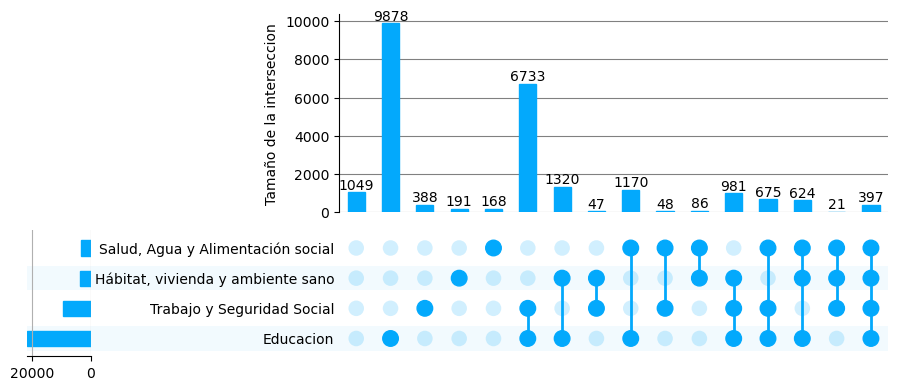

In [109]:
from upsetplot import UpSet
import matplotlib.pyplot as plt

# Convertimos el DataFrame a un DataFrame de booleanos
df_boolean = df_dimension[['Educacion', 'Hábitat, vivienda y ambiente sano', 'Salud, Agua y Alimentación social', 'Trabajo y Seguridad Social']] == 1

# Reseteamos el índice del DataFrame
df_boolean.reset_index(drop=True, inplace=True)
df_boolean = df_boolean.set_index(df_boolean.columns.tolist())

# Creamos el UpSet plot
upset = UpSet(df_boolean, subset_size='count', facecolor='#03a9fc')
upset.plot()

# Cambiamos el color de los puntos
for dot in plt.gca().findobj(plt.Line2D):
    dot.set_color('gray')

# Añadimos el valor de cada barra
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.ylabel('Tamaño de la interseccion')

plt.show()

## Guardamos la base filtrada

In [37]:
# Exportamos el dataframe a un archivo .csv
df_indices.to_csv('indices_pobreza.csv', index=False)

# Exportamos el dataframe a un archivo .xlsx
df_indices.to_excel('indices_pobreza.xlsx', index=False)

# Indicador General de Pobreza Multidimensional
- Pesos de Indicadores 1,2,3,4,5,6 = 8.3%
- Pesos de Indicadores 7,8 = 12,5%
- Pesos de Indicadores 9,10,11,12 = 6.25%

In [38]:
indice_pobreza = ((i1 + i2 + i3 + i4 + i5 + i6)* 8.3 + (i7 + i8)* 12.5 + (i9 + i10 + i11 + i12)* 6.25) / 23776
indice_pobreza

21.1205774730821

### Conclusiones
El indicador general de pobreza multidimensional es 21.12%, el cual es menor al 25% del total de privaciones posibles. Por ende, Ecuador no se encuentra en situación de pobreza